In [1]:
from new_basis_llp_qaoa.statevector_sim.statevector_llp import StateVectorLLP
import numpy as np
from scipy.sparse import identity, csc_matrix
from scipy.sparse.linalg import expm, eigsh
from new_basis_llp_qaoa.statevector_sim.statevector_llp import unitary_a
from PIL import Image


In [9]:
def generate_random_dataset(M, N, strength=0.2):
    As = np.zeros((N, N))
    for i in range(N):
        for j in range(i):
            x = np.random.random()
            while x > strength:
                x = np.random.random()
            As[i][j] = x
            As[j][i] = x

    Qs = np.zeros((N, M))
    expected_returns = np.linspace(1 / M, 1, M)[:: -1] * (1 / M)
    Vs = As.sum(axis=1)
    for i in range(N):
        np.random.shuffle(expected_returns)
        Qs[i, :] = Vs[i] * expected_returns
    return As, Qs


np.random.seed(40)
As, Qs = generate_random_dataset(3, 2)
state = "ones"
p = 1
svllp = StateVectorLLP(Qs, As, 1 / 20, p, state)
I = identity(2**svllp.qubits_number)


In [10]:
svllp.optimized()

caching_ha
Constructing profit term


100%|██████████| 2/2 [00:00<00:00, 357.40it/s]


Constructing welfare term


100%|██████████| 2/2 [00:00<00:00, 1058.77it/s]


caching_hb
constructing mixer


100%|██████████| 3/3 [00:00<00:00, 1958.43it/s]

constructing UA gate
took 0.00040078163146972656s
constructing UB gate
took 0.0060579776763916016s
constructing UA gate
took 0.0003249645233154297s
constructing UB gate
took 0.005057096481323242s
constructing UA gate
took 0.0001919269561767578s
constructing UB gate
took 0.004101991653442383s
constructing UA gate
took 0.00018978118896484375s
constructing UB gate
took 0.003785848617553711s
constructing UA gate
took 0.00017213821411132812s
constructing UB gate
took 0.0036330223083496094s
constructing UA gate
took 0.00015807151794433594s
constructing UB gate
took 0.0036160945892333984s
constructing UA gate
took 0.00017213821411132812s
constructing UB gate
took 0.004164695739746094s
constructing UA gate
took 0.00018477439880371094s
constructing UB gate
took 0.004067182540893555s
constructing UA gate
took 0.00018095970153808594s
constructing UB gate
took 0.003528118133544922s
constructing UA gate
took 0.00015735626220703125s
constructing UB gate
took 0.002959012985229492s
constructing UA gat

took 0.0037648677825927734s
constructing UA gate
took 0.00017213821411132812s
constructing UB gate
took 0.004181861877441406s
constructing UA gate
took 0.00022029876708984375s
constructing UB gate
took 0.004050254821777344s
constructing UA gate
took 0.0002219676971435547s
constructing UB gate
took 0.0036530494689941406s
constructing UA gate
took 0.0002491474151611328s
constructing UB gate
took 0.004074811935424805s
constructing UA gate
took 0.00020503997802734375s
constructing UB gate
took 0.004024028778076172s
constructing UA gate
took 0.00018262863159179688s
constructing UB gate
took 0.0032100677490234375s
constructing UA gate
took 0.00018715858459472656s
constructing UB gate
took 0.0033080577850341797s
constructing UA gate
took 0.00018978118896484375s
constructing UB gate
took 0.003171682357788086s
constructing UA gate
took 0.00017595291137695312s
constructing UB gate
took 0.003300189971923828s
constructing UA gate
took 0.00017976760864257812s
constructing UB gate
took 0.00344681739

/Users/chayaponthunsetkul/Library/Caches/pypoetry/virtualenvs/newbasisimbq-JkixFnlr-py3.10/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:229: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',
/Users/chayaponthunsetkul/Library/Caches/pypoetry/virtualenvs/newbasisimbq-JkixFnlr-py3.10/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:302: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '
/Users/chayaponthunsetkul/Library/Caches/pypoetry/virtualenvs/newbasisimbq-JkixFnlr-py3.10/lib/python3.10/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Users/chayaponthunsetkul/Library/Caches/pypoetry/virtualenvs/newbasisimbq-JkixFnlr-py3.10/lib/python3.10/site-p

<BarContainer object of 16 artists>

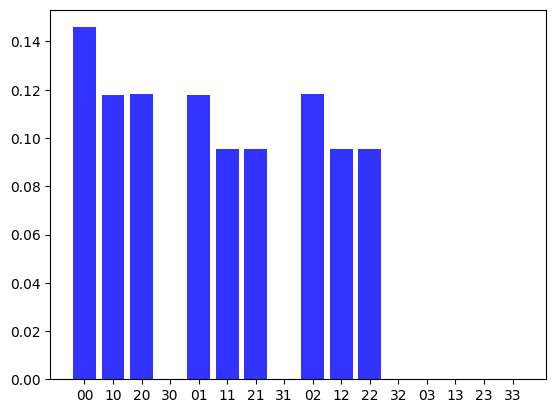

In [11]:
from matplotlib import pyplot as plt

prob = svllp.probabilities
x = range(2**svllp.qubits_number)
x = list(svllp.get_str_from_index(ind) for ind in x)
plt.bar(x=x,height=prob, color='b', alpha=0.8)


In [5]:
def pade_expm(x):
    numerator = I + 1/2*x + 1/9*x**2 + 1/72 * x**3 + 1/1008 * x**4 + 1/30240 * x**5
    denominator = I - 1/2*x + 1/9*x**2 - 1/72 * x**3 + 1/1008 * x**4 - 1/30240 * x**5
    return numerator/denominator
def taylor_expm(x, beta):
    x = x * -1j * beta
    return I + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + x**6/720 + x**7/5040
def taylor_expm_demo(x,x2,x3,x4):
    return I + x + x2/2 + x3/6 + x4/24


